In [3]:
#텐서보드 설치
#$ conda install -c conda-forge tensorboard
!pip install jupyter-tensorboard

You should consider upgrading via the '/home/ubuntu/anaconda3/bin/python -m pip install --upgrade pip' command.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import time

In [5]:
dir_path = "/home/lab19/csv_file/"
dirlist = os.listdir(dir_path)
for file_name in dirlist:
    
    if(file_name == '.ipynb_checkpoints'):
        continue
    if os.path.isdir(dir_path+file_name):
        continue
    file_name_csv = file_name.split(".")[1]
    if(file_name_csv != 'csv'):
        continue
    print("file_name : ", file_name)
    file_name_cp = file_name.split(".")[0]
    file_date = file_name_cp.split("_")[0]
    file_title = file_name_cp.split("_")[1]
    print("file_date : ", file_date)
    print("file_title : ", file_title)

file_name :  loss_frm.csv
file_date :  loss
file_title :  frm
file_name :  loss_frm2.csv
file_date :  loss
file_title :  frm2
file_name :  20220610_Mnist.csv
file_date :  20220610
file_title :  Mnist


In [6]:
def tensor_chart(loss_frm, file_name_cp, file_date, file_title):
    # train 결과  -> 텐서보드 
    from torch.utils.tensorboard import SummaryWriter
    # 로그저장위치

    #writer = SummaryWriter('/content/runs/mnist/'+file_name_cp)
    writer = SummaryWriter('/home/lab19/csv_file/'+file_name_cp)
    
    print(len(loss_frm.columns))
    print(loss_frm.columns[0])

    if len(loss_frm.columns) < 3:
      print('len(loss_frm.columns) < 3')
      for epoch, loss in zip(loss_frm[loss_frm.columns[0]], loss_frm[loss_frm.columns[1]]):
          writer.add_scalar(loss_frm.columns[1], loss, epoch)
        
    elif len(loss_frm.columns) < 4:
      print('len(loss_frm.columns) < 4')
      for epoch, loss, acc in zip(loss_frm[loss_frm.columns[0]], loss_frm[loss_frm.columns[1]], loss_frm[loss_frm.columns[2]]):
          writer.add_scalar(loss_frm.columns[1], loss, epoch)
          writer.add_scalar(loss_frm.columns[2], acc, epoch)
        
    elif len(loss_frm.columns) < 5:
      print('len(loss_frm.columns) < 5')
      for epoch, loss, acc, test_loss in zip(loss_frm[loss_frm.columns[0]], loss_frm[loss_frm.columns[1]], loss_frm[loss_frm.columns[2]], loss_frm[loss_frm.columns[3]]):
          writer.add_scalar(loss_frm.columns[1], loss, epoch)
          writer.add_scalar(loss_frm.columns[2], acc, epoch)
          writer.add_scalar(loss_frm.columns[3], test_loss, epoch)
          
    elif len(loss_frm.columns) < 6:
      print('len(loss_frm.columns) < 6')
      for epoch, loss, acc, test_loss, test_acc in zip(loss_frm[loss_frm.columns[0]], loss_frm[loss_frm.columns[1]], loss_frm[loss_frm.columns[2]], loss_frm[loss_frm.columns[3]], loss_frm[loss_frm.columns[4]]):
          writer.add_scalar(loss_frm.columns[1], loss, epoch)
          writer.add_scalar(loss_frm.columns[2], acc, epoch)
          writer.add_scalar(loss_frm.columns[3], test_loss, epoch)
          writer.add_scalar(loss_frm.columns[4], test_acc, epoch)




    # 텐서보드 writer flush, close
    writer.flush()
    writer.close()
    # 텐서보드 실행
    %load_ext tensorboard
    #%tensorboard --logdir /content/runs/mnist/$file_name_cp
    %tensorboard --logdir /home/lab19/csv_file/$file_name_cp

'''
for epoch, loss, acc, test_loss, test_acc in zip(loss_frm['epoch'], loss_frm['train_loss'], loss_frm['train_acc'], loss_frm['test_loss'], loss_frm['test_acc']):
  writer.add_scalar('train_loss', loss, epoch)
  writer.add_scalar('train_acc', acc, epoch)
  writer.add_scalar('test_loss', test_loss, epoch)
  writer.add_scalar('test_acc', test_acc, epoch)
# 텐서보드 writer flush, close
writer.flush()
writer.close()
'''

"\nfor epoch, loss, acc, test_loss, test_acc in zip(loss_frm['epoch'], loss_frm['train_loss'], loss_frm['train_acc'], loss_frm['test_loss'], loss_frm['test_acc']):\n  writer.add_scalar('train_loss', loss, epoch)\n  writer.add_scalar('train_acc', acc, epoch)\n  writer.add_scalar('test_loss', test_loss, epoch)\n  writer.add_scalar('test_acc', test_acc, epoch)\n# 텐서보드 writer flush, close\nwriter.flush()\nwriter.close()\n"

In [7]:
def matplot_chart(loss_frm, file_name_cp, file_date, file_title):
    epoch = loss_frm[loss_frm.columns[0]]
    data01 = loss_frm[loss_frm.columns[1]]
    if len(loss_frm.columns) > 2:
        data02 = loss_frm[loss_frm.columns[2]]
    if len(loss_frm.columns) > 3:
        data03 = loss_frm[loss_frm.columns[3]]
    if len(loss_frm.columns) > 4:
        data04 = loss_frm[loss_frm.columns[4]]

    plt.figure( figsize = (15, 5))

    plt.plot(epoch, data01.values, label=loss_frm.columns[1])
    plt.plot(epoch, data02.values, label=loss_frm.columns[2])
    if len(loss_frm.columns) > 3:
        plt.plot(epoch, data03.values, label=loss_frm.columns[3])
    if len(loss_frm.columns) > 4:
        plt.plot(epoch, data04.values, label=loss_frm.columns[4])

    plt.xlabel(loss_frm.columns[0])
    plt.ylabel('')
    plt.title(file_date + '  - ' + file_title)

    # 눈금 라벨 회전(x 축)
    #plt.xticks(rotation = 'vertical')
    # 범례
    plt.legend(loc = 'best', fontsize = 15)

    plt.show()
    plt.close()

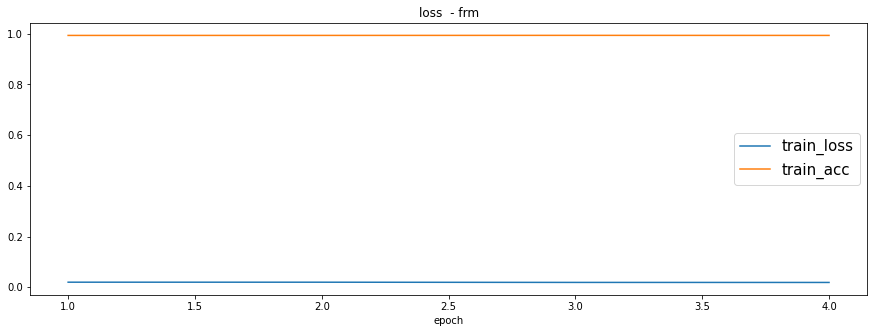

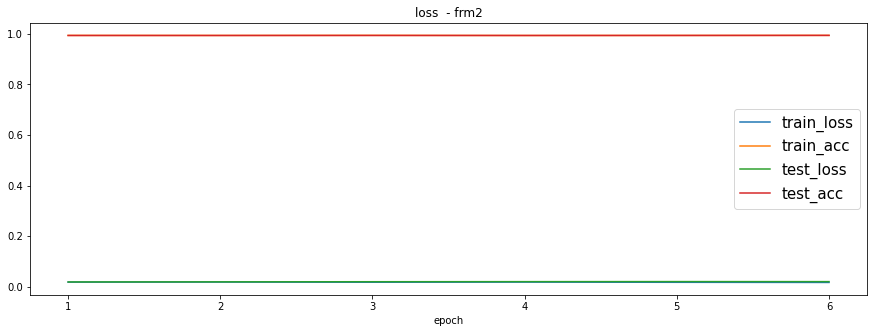

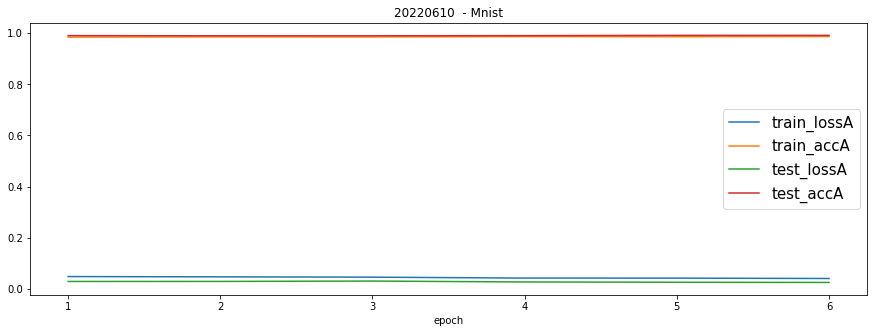

In [8]:
for file_name in dirlist:
    if(file_name == '.ipynb_checkpoints'):
        continue
    if os.path.isdir(dir_path+file_name):
        continue
    file_name_csv = file_name.split(".")[1]
    if(file_name_csv != 'csv'):
        continue
    
    file_name_cp = file_name.split(".")[0]
    file_date = file_name_cp.split("_")[0]
    file_title = file_name_cp.split("_")[1]
    
    loss_frm = pd.read_csv(dir_path+file_name)
    loss_frm = loss_frm.drop(columns = ['Unnamed: 0'])

#     print(loss_frm)
#     print(loss_frm['epoch'])
#     print(loss_frm.columns)
#     print(len(loss_frm.columns))
    #tensor_chart(loss_frm, file_name_cp, file_date, file_title)
    #time.sleep(10)
    matplot_chart(loss_frm, file_name_cp, file_date, file_title)
    #time.sleep(10)